# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


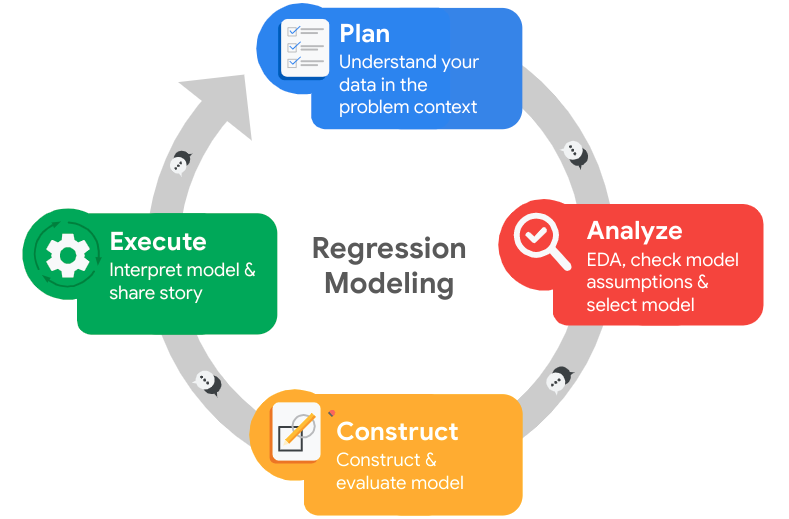

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Human resource in Salifort company.
2. Help improve environment of employee in Salifort. That why employee leave in company too much and finding the answer with data observation in HR employee dataset.
3. Employee or Personal data with protected by HR. about life style in office + evaluation + left status
4. By link
    
    4.1. PACE model:
    
    4.2. Dashboard:  https://public.tableau.com/views/Whysalifortemployeeleavefromcompany/WhyemployeeleftinSalifortCompany?:language=th-TH&:display_count=n&:origin=viz_share_link 
    
    4.3. Dashboard Presentation: https://mailkmuttacth.sharepoint.com/sites/Test113721/_layouts/15/stream.aspx?id=%2Fsites%2FTest113721%2FShared%20Documents%2FGeneral%2FRecordings%2FTableau%20Presentation%2D20231217%5F190656%2DMeeting%20Recording%2Emp4&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview
    
    4.4. Jupyter Notbook result:
    
    4.5. Excutive Summary Result:
    
    4.6. Final presentation:
    
5. GDPR and Data integrity (without bias when survey)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from tensorflow import keras
from tensorflow.keras import layers

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                          'Work_accident':'work_accident',
                          'promotion_last_5years':'promotion_last_5_years',
                          'Department':'department'
                         })

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().all()

satisfaction_level        False
last_evaluation           False
number_project            False
average_monthly_hours     False
time_spend_company        False
work_accident             False
left                      False
promotion_last_5_years    False
department                False
salary                    False
dtype: bool

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df_d1 = df0[df0.duplicated(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'])]
df_d1

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0 = df0.drop_duplicates()

# make sure data will remove duplicate
df_d1 = df0[df0.duplicated(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'])]
print(df_d1)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0.head()

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company, work_accident, left, promotion_last_5_years, department, salary]
Index: []


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

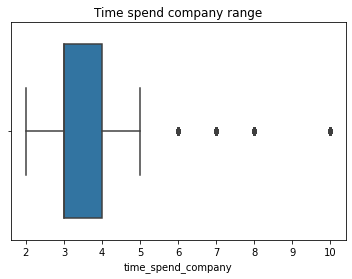

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x="time_spend_company", data=df0)
plt.title("Time spend company range")
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
Q1_tenure = df0["time_spend_company"].quantile(0.25)
Q3_tenure = df0["time_spend_company"].quantile(0.75)
IQR = Q3_tenure - Q1_tenure
IQR_1 = Q1_tenure - 1.5 * IQR
IQR_2 = Q3_tenure + 1.5 * IQR
print(f"IQR range between : {IQR_1} to {IQR_2}")
count_outliner = len(df0[df0["time_spend_company"] > IQR_2])
print(f"count of outliner : {count_outliner}")

# save data before plot data visualization
save_df0 = df0[df0["time_spend_company"] <= IQR_2]
save_df0.to_csv("HR_capstone_clean.csv")

IQR range between : 1.5 to 5.5
count of outliner : 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Left people and Stay people, company working time in monthly hour, number project, promotion number at last 5 years, department of employees, tenure working at years. By overall from why employee really quit in company?
2. Type of employee who exit, boxplot of employee when working in company time and really quit with statisfaction and evaluation score, scatter plot by using scaling of data plot and group with label, type of department
3. Transfrom by rename field, check na value, drop duplicate data.
4. Find root cause of insight from problem why employee in salifort company must quit too much. before make model assumption and construct model.
    
    6.1. When join data to another one make sure data is clean before visualization and make model.
    
    6.2. If insight are not clear, asking question before and find answer from defined in very detail.
    
    6.3. If find true insight successfully please care about personal protection when share on private organization and public. 

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

0    9285
1    1882
Name: left, dtype: int64


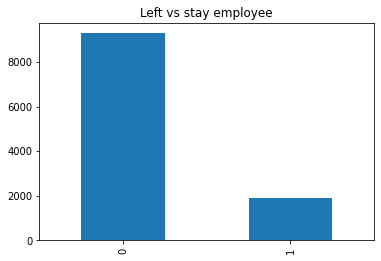

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

group_left = save_df0["left"].value_counts()
print(group_left)

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
group_left.plot(x="left", kind='bar')
plt.title("Left vs stay employee")
plt.show()

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

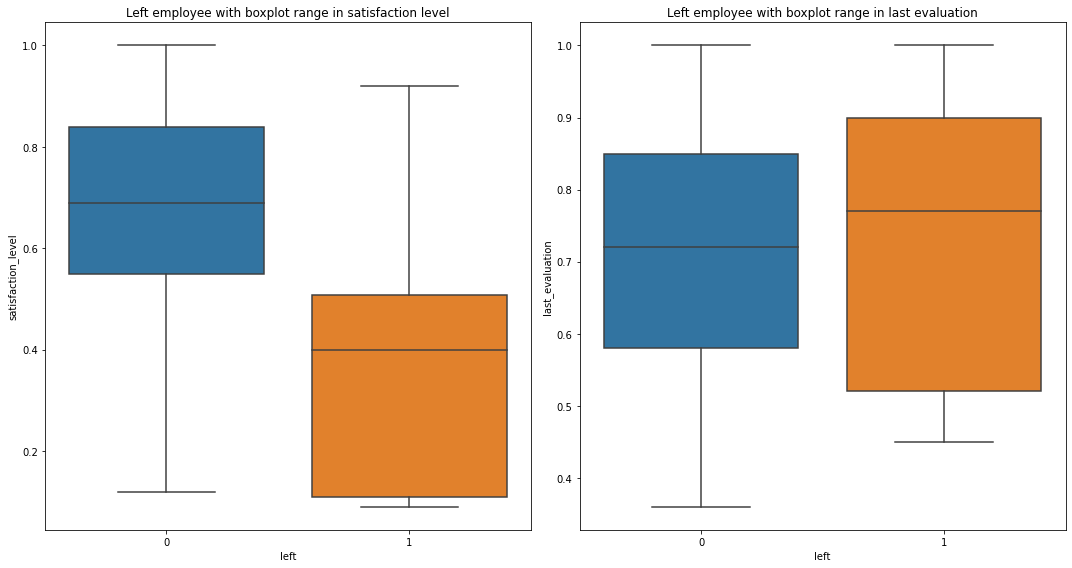

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###

# comparison between left vs stay employee with satisfaction levels and evaluation levels with box plot
fig,axs = plt.subplots(1,2, figsize=(15, 8))
sns.boxplot(x="left",y="satisfaction_level", data=save_df0, ax=axs[0])
axs[0].set_title("Left employee with boxplot range in satisfaction level")
sns.boxplot(x="left",y="last_evaluation", data=save_df0, ax=axs[1])
axs[1].set_title("Left employee with boxplot range in last evaluation")
plt.tight_layout()
plt.show()

### Result the boxplot show
- Satisfaction level of left employees are more unsatisfaction than stay employees.
- In HR last evaluation, left employees has score range and median score is sightly higher than stay employees that mean average employee must have same is very unscale to predict result.

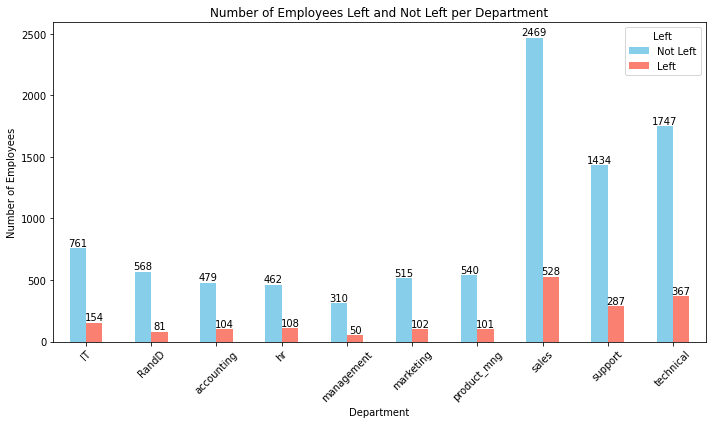

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###

# Pivot the data to prepare for plotting
count_department = save_df0.groupby(["department", "left"]).size().reset_index(name="count")
pivot_data = count_department.pivot(index='department', columns='left', values='count').fillna(0)

# Create a grouped bar chart
ax = pivot_data.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(10, 6))

# Adding labels and title
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Left and Not Left per Department')
plt.legend(title='Left', labels=['Not Left', 'Left'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding annotations to display values on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

### The result of department show
- department of sales has the most in each department, and have most left employee in company.
- each departments have ratio of leave by 1 left per 7 stay employees by estimation. 

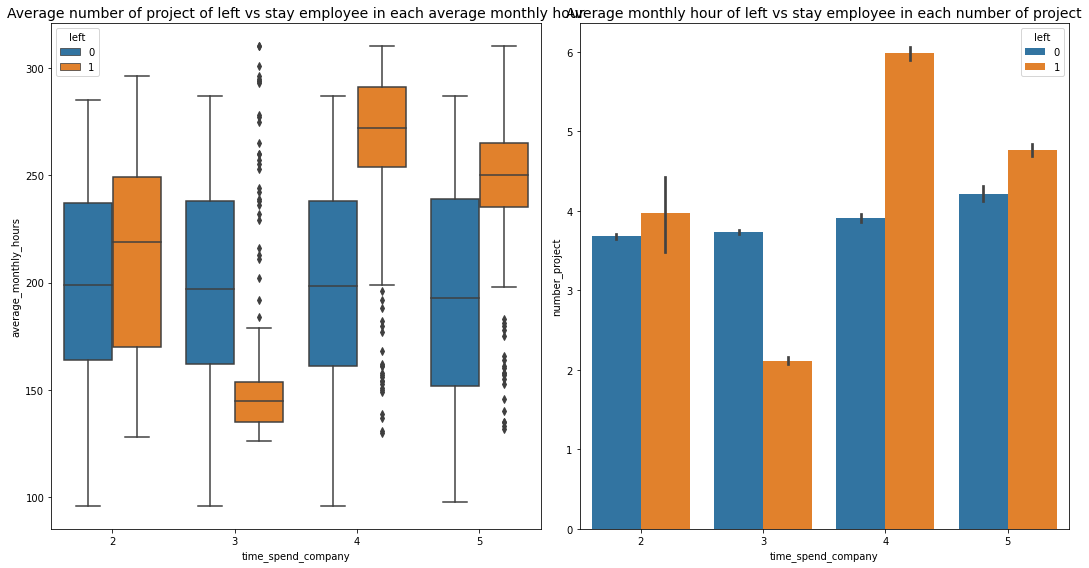

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
# line cart of left vs stay employee when he working with number of project
fig,axs = plt.subplots(1,2, figsize=(15, 8))
sns.boxplot(x="time_spend_company",y="average_monthly_hours", hue="left", dodge=True, data=save_df0, ax=axs[0])
axs[0].set_title('Average number of project of left vs stay employee in each average monthly hour', fontsize='14')
sns.barplot(x="time_spend_company",y="number_project", hue="left", data=save_df0, ax=axs[1])
axs[1].set_title('Average monthly hour of left vs stay employee in each number of project', fontsize='14')
plt.tight_layout()
plt.show()

### Result the comparison of tenure in each data left vs stay employees show
- When comparing by average monthly hours. In stay employee has stable boxplot in each tenure like interquantiles between 160-240 hours per month but left people no. In tenure 2 years left employee and stay employee has nearly interquantile without outliner. In tenure 3 years has different between left vs stay employees by almost left employee left lower than 160 hours per month. In tenure 4 and 5 years left employee has more monthly hours for working that mean they are more overwork and nearly burnout syndomes so they left from company.
- When comparing by number project. In stay employee has stable boxplot in each tenure like interquantiles between 3-4 projects but left people no. In 3 years employees has do some project by 2 projects that mean they are quite very boring and quit in after that. In 4 and 5 years this graph show as same as from previous look like this.

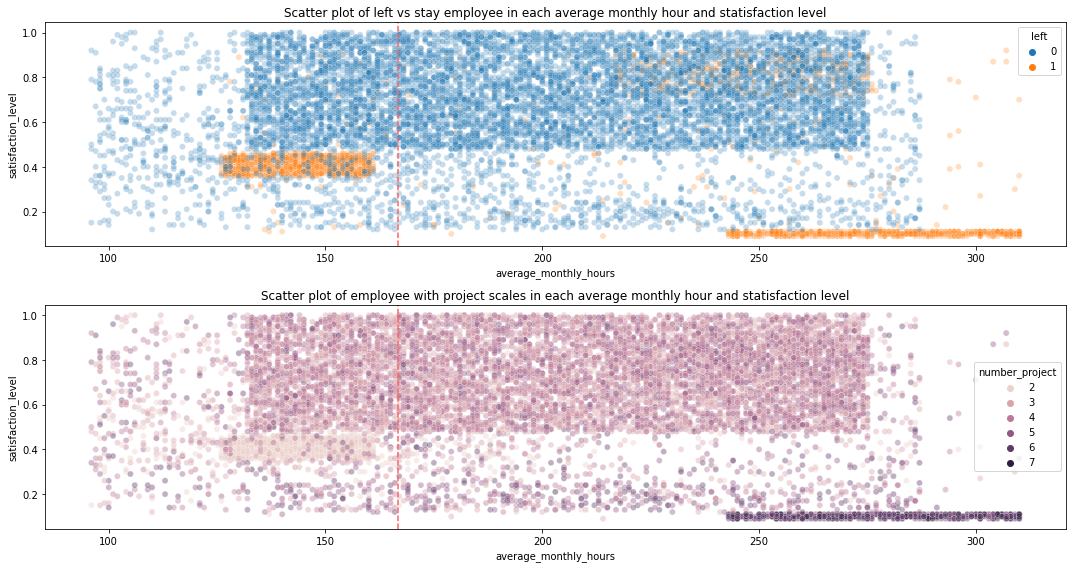

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

# scatter plot comparison between satisfaction level, last evaluation and average monthly hours of Left vs Stay employee
fig, ax = plt.subplots(2,1,figsize=(15, 8))
sns.scatterplot(x="average_monthly_hours",y="satisfaction_level", hue="left",alpha=0.25 , data=save_df0, ax=ax[0])
ax[0].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
ax[0].set_title('Scatter plot of left vs stay employee in each average monthly hour and statisfaction level')
sns.scatterplot(x="average_monthly_hours",y="satisfaction_level", hue="number_project",alpha=0.4 , data=save_df0, ax=ax[1])
# sns.scatterplot(x="average_monthly_hours",y="satisfaction_level", hue="left",alpha=0.1 , data=save_df0, ax=axs[1,0])
ax[1].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
ax[1].set_title('Scatter plot of employee with project scales in each average monthly hour and statisfaction level')
plt.tight_layout()
plt.show()

### Comparison in average monthly hours
- be average working in company has 40 days/week and has 50 weeks per year not including rested day in new years so that `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`
- by left employee data can separated data into 3 groups. Firstly, satisfaction levels range 0.35-0.45 and average monthly hours in range 125-165 hours that means people who under working in average working and quite boring for have 2 project so that the employee must be quited or fired from company that mean working in company that not enough. Secondary, hidden very statisfied people in range 0.7-0.9 with work in 220-270 hours per month that mean some employee quit from company because they are very uncomfortable with hard work in this tenure range than average monthly work. and Finally, left employee that very unstatisfied because they are hardly working in company in statisfication level 0.05-0.1 with working range 240-315 hours per month.

That make obviously quit in employee 280 hours per month or higher or `12 months * 280 hours per month / 50 weeks  = 67.2 hours per week or higher or over than 9.6 hours per day` that mean very hard working or overwork because they very tried for working so they giving very unstatisfied to company and rage quited.

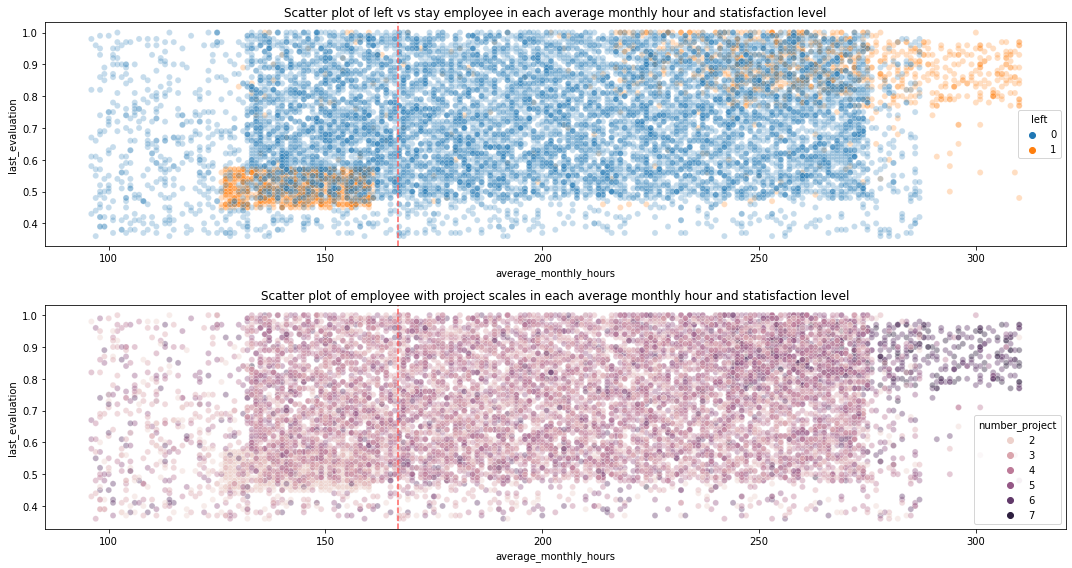

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
# scatter plot comparison between satisfaction level, last evaluation and average monthly hours of Left vs Stay employee
fig, ax = plt.subplots(2,1,figsize=(15, 8))
sns.scatterplot(x="average_monthly_hours",y="last_evaluation", hue="left",alpha=0.25 , data=save_df0, ax=ax[0])
ax[0].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
ax[0].set_title('Scatter plot of left vs stay employee in each average monthly hour and statisfaction level')
sns.scatterplot(x="average_monthly_hours",y="last_evaluation", hue="number_project",alpha=0.4 , data=save_df0, ax=ax[1])
# sns.scatterplot(x="average_monthly_hours",y="satisfaction_level", hue="left",alpha=0.1 , data=save_df0, ax=axs[1,0])
ax[1].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
ax[1].set_title('Scatter plot of employee with project scales in each average monthly hour and statisfaction level')
plt.tight_layout()
plt.show()

### Comparison in HR last evaluation
- by left employee data can separated data into 2 groups. Firstly, evaluation levels in range 0.45-0.6 and average monthly hours in range 125-165 hours that means people who under working in average working and quite boring for have 2 project and lower score in last evaluation so that the employee must be quited or fired from company that mean working in company that not enough.
- Lastly, hidden very high people in range 0.8-0.95 with work in 220-320 hours per month that mean some employee quit from company because they are very uncomfortable with hard work in this tenure range and HR give very high score in evaluation levels that means not obviously fair for left people.

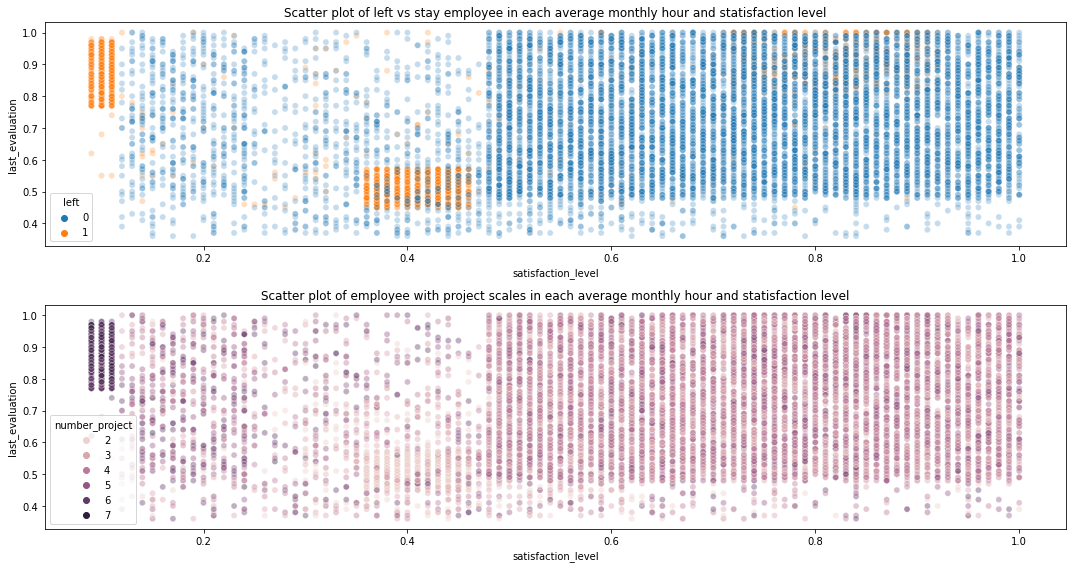

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# scatter plot comparison between satisfaction level, last evaluation and average monthly hours of Left vs Stay employee
fig, ax = plt.subplots(2,1,figsize=(15, 8))
sns.scatterplot(x="satisfaction_level",y="last_evaluation", hue="left",alpha=0.25 , data=save_df0, ax=ax[0])
# ax[0].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
ax[0].set_title('Scatter plot of left vs stay employee in each average monthly hour and statisfaction level')
sns.scatterplot(x="satisfaction_level",y="last_evaluation", hue="number_project",alpha=0.4 , data=save_df0, ax=ax[1])
# sns.scatterplot(x="average_monthly_hours",y="satisfaction_level", hue="left",alpha=0.1 , data=save_df0, ax=axs[1,0])
# ax[1].axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
ax[1].set_title('Scatter plot of employee with project scales in each average monthly hour and statisfaction level')
plt.tight_layout()
plt.show()

## HR last evaluation and satisfaction_level
- In summarized that the most employees that really quit from company that come from overheat pressures with over 7 projects or quite boring from 2 projects with do not thing, and in square size of evaluation score 0.5-1 with statisfied score 0.5-1 has some employees exited in each rows may be because some employee have uncomfortable hard working.

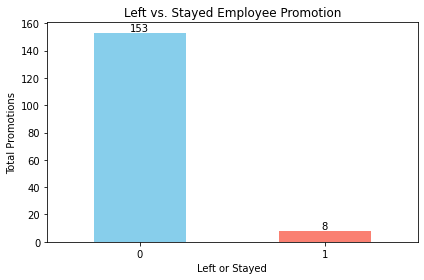

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a bar chart
group_promotion = save_df0.groupby("left")["promotion_last_5_years"].sum()
ax = group_promotion.plot(kind="bar", color=['skyblue', 'salmon'])

# Adding labels and title
plt.title("Left vs. Stayed Employee Promotion")
plt.xlabel("Left or Stayed")
plt.ylabel("Total Promotions")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Adding value labels to the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

## Comparison left vs stay employees
- by always left people has very low promotions in last 5 years events when compare to stay employee.

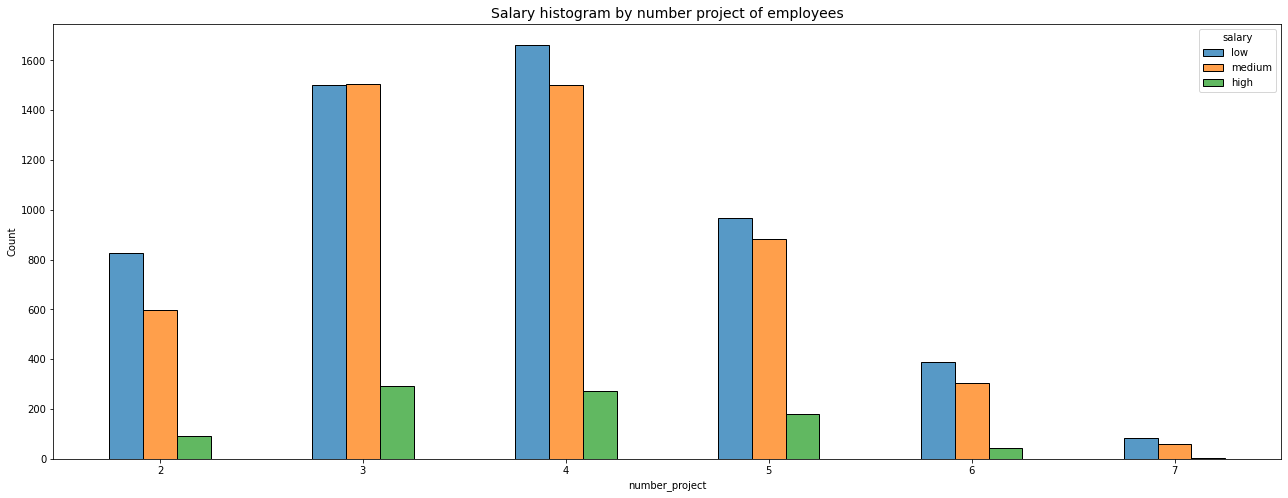

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig = plt.subplots(1,figsize = (22,8))

# Plot short-tenured histogram
sns.histplot(data=save_df0, x='number_project', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5)
plt.title('Salary histogram by number project of employees', fontsize='14')
plt.show()

### From number project histogram with salary show
- employee who have salary when compare to salary when they get. That found it. They still not different ratio between low medium and high salary in 4-7 projects. and 3 projects have more perfect time giving medium salary has a very slightly more than low salary employees.

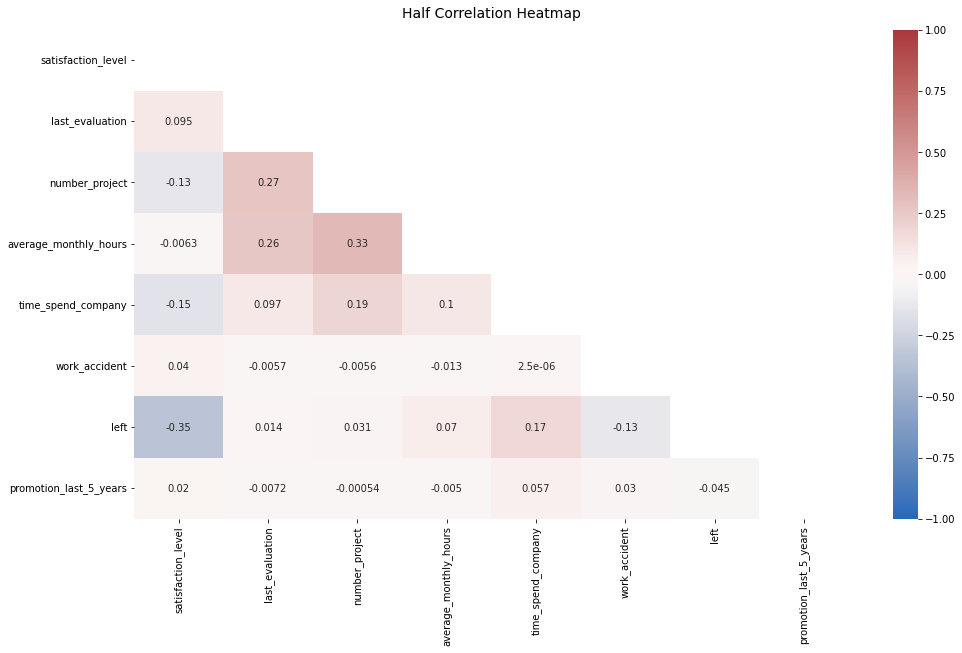

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

# Calculate the correlation matrix
corr_matrix = df0.corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Half Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

### Insights

- Why employee frequency change on company. from insight show almost 2 group of employee that really quit with 2 reasons.
1. employee have pressure from their work with 9.6 hours per day that more than 8 hours per day if HR manager reduce time with at most 8 hours per days that means among employees are very happy and keep their pressure for their work lower so make statisfies score of each employee higher, and If they get more promotion they still live in company.
2. employee who have very low number of project like 2 project with normally day that quite easy util boring if they get more project for more compensation that may be better for investment, and make evaluation score getting inner bigger score of scaling sqaure from previous insight.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. yes, why satisfied of left employee is low, why many number project in employee is over 7 is left, why over half employee is overworking more than 166.67 hours per month, why left employees get promotion lower than stay employees, why over work employee get evaluation score is higher than anyone.
2. 'satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company' and 'promotion_last_5_years'
3. yes
4. count from shape of column all data is encoding by number by split into train/test data, random data is not overfit and underfit including can predict class from independent values
5. reuse feature engineering for customize feature that effected to dataframe with condition
    
    6.1. result must have AUC ROC between 0.8-1 as well.
    
    6.2. If model have result bad result need to improve them, then if model have good result but cannot use very well or inefficiency in other situation need to renew features for make more effiency model
    
    6.3. Should not see especially accuracy value because some class cannot predict correctly. I should see overall result such as precision, recall, f1 score and AUC ROC.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Predict employees who left or stay with data source, by target class is `left` column that can show value of outcome from left employees class is 1 and non left employees is 0.

### Identify the types of models most appropriate for this task.

In test case we use
- Logistic regression
- Decision tree with basic model
- Random forest with XGboost
- Neural Network with multiple layers perceptron or MLP

for predict model and evaluate with most efficient score and can save for using in other test case.

### Modeling

Add as many cells as you need to conduct the modeling process.

## Modeling Approach A: Logistic Regression Model
This approach covers implementation of Logistic Regression.

## Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: department and salary.

department is a categorical variable, which means you can dummy it for modeling.

salary is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.

In [23]:
### YOUR CODE HERE ###
selected_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'promotion_last_5_years']

X = save_df0[selected_columns].copy() if len(selected_columns) else save_df0.copy()

Y = save_df0['left']

if 'salary' in selected_columns:
    le = LabelEncoder()
    le.fit(df0["salary"])
    print(le.classes_)
    X["salary"] = le.transform(df0["salary"]) - 1

# Dummy encode the `department` column
if 'department' in selected_columns:
    X = pd.get_dummies(features, columns=["department"], drop_first=False)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,promotion_last_5_years
0,0.38,0.53,2,157,3,0
2,0.11,0.88,7,272,4,0
3,0.72,0.87,5,223,5,0
4,0.37,0.52,2,159,3,0
5,0.41,0.50,2,153,3,0


## Make data can rescaling for predict data
- by using standard scalar for calculating standard value `Z value = (input-mean)/SD` when use in normal distribution.

In [24]:
# ### YOUR CODE HERE ###
# Assuming 'X' contains the features and 'Y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(f"train size {X_train.shape} per test size {X_test.shape}")

train size (8375, 6) per test size (2792, 6)


Best Parameters: {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Accuracy on Test Set: 0.8212750716332379
Precision on Test Set: 0.47368421052631576
Recall on Test Set: 0.22176591375770022
F1 score on Test Set: 0.3020979020979021
Area of under curve on Test Set: 0.5848525881152926


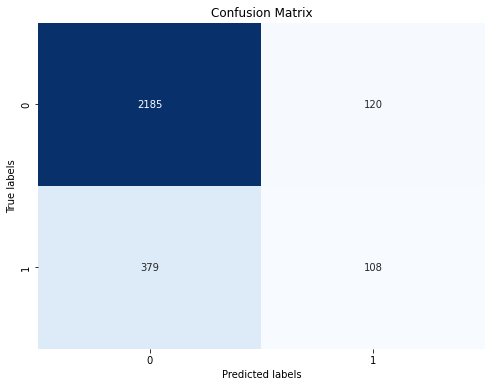

In [25]:
### YOUR CODE HERE ###

# Modeling Approach A: Logistic Regression Model

# before make effiency model like Logistic Regression Model that make hyperparameter for better to use with grid search

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

# Define hyperparameters to tune
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logistic__solver': ['liblinear', 'saga'],  # Solver for logistic regression
    'logistic__penalty': ['l2','l1']
}

# Perform GridSearchCV for hyperparameter tuning
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=scoring, refit='roc_auc')
grid_search.fit(X_train, Y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with best parameters on the test set
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_1 = accuracy_score(Y_test, Y_pred)
precision_1 = precision_score(Y_test, Y_pred)
recall_1 = recall_score(Y_test, Y_pred)
f1_1 = f1_score(Y_test, Y_pred)
auc_1 = roc_auc_score(Y_test, Y_pred)

# Calculate confusion matrix
cm_1 = confusion_matrix(Y_test, Y_pred)

print("Accuracy on Test Set:", accuracy_1)
print("Precision on Test Set:", precision_1)
print("Recall on Test Set:", recall_1)
print("F1 score on Test Set:", f1_1)
print("Area of under curve on Test Set:", auc_1)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [27]:
## estimator evaluation
make_results("logistric regression",grid_search,"auc")

,model,precision,recall,F1,accuracy,auc
0,logistric regression,0.427649,0.222225,0.291763,0.821493,0.87757


### Confusion matrix:

The upper-left quadrant displays the number of true negatives.

The upper-right quadrant displays the number of false positives.

The bottom-left quadrant displays the number of false negatives.

The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

### By metrices to using in each model:
- accuracy means test data how predict in overall class correctly. If more 90% that means this model okay for solve the answer.
- precision means test data how predict in all predict class correctly when use class to predict.
- recall means test data how call data in actual class that call to class correctly.
- f1 score means test data with comparison on precision and recall
- area of under curve in rate of change of recall state use for mesures randomize data when train and test split model for predict data.

## In summary model can make
train data have accuracy by 82% so that logistic regression model can do best for predicting but have model can make more efficient way to do more accuracy data and take aways more precision and recall in each class and randomized state train test data is very poor of test model in AUC ROC curve.

test data have accuracy by 82% so that logistic regression model can do best for predicting as same as train data evaulation.

## Modeling Approach B-1: Tree-based Model (Decision tree model)

This approach covers implementation of Decision Tree.

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy on Test Set: 0.9806590257879656
Precision on Test Set: 0.9616204690831557
Recall on Test Set: 0.9260780287474333
F1 score on Test Set: 0.9435146443514644
Area of under curve on Test Set: 0.959134459059183


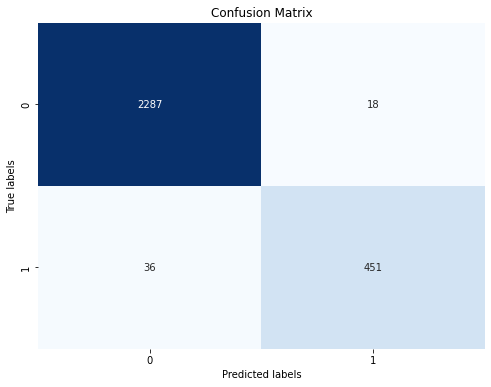

In [28]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

tree1.fit(X_train, Y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", tree1.best_params_)

# Evaluate the model with best parameters on the test set
best_model = tree1.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_2 = accuracy_score(Y_test, Y_pred)
precision_2 = precision_score(Y_test, Y_pred)
recall_2 = recall_score(Y_test, Y_pred)
f1_2 = f1_score(Y_test, Y_pred)
auc_2 = roc_auc_score(Y_test, Y_pred)

# Calculate confusion matrix
cm_2 = confusion_matrix(Y_test, Y_pred)

print("Accuracy on Test Set:", accuracy_2)
print("Precision on Test Set:", precision_2)
print("Recall on Test Set:", recall_2)
print("F1 score on Test Set:", f1_2)
print("Area of under curve on Test Set:", auc_2)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
## estimator evaluation
make_results("decision tree",tree1,"auc")

,model,precision,recall,F1,accuracy,auc
0,decision tree,0.955216,0.917564,0.936007,0.979105,0.973287


## In summary model can make

train data with grid search for search best parameters have accuracy by 98% so decision tree model that way better than logistic regression model. this model in this test case can make more efficient way to make accuracy data increasely and take aways more precision is 96%, recall is 92% by estimation and f1 score is 94% in each class and randomized state train test data is excellent of test model in AUC ROC curve by 97% by estimation.

test data with accuracy by 98% so decision tree model that way better than logistic regression model. this model in this test case can make more efficient way to make accuracy data increasely and take aways more precision is 96%, recall is 93% by estimation and f1 score is 94% in each class and randomized state train test data is excellent of test model in AUC ROC curve by 96% by estimation that nearest same to train data validation.

but why decision tree model make efficient ways for predict test data and can predict anonymous features from other data?

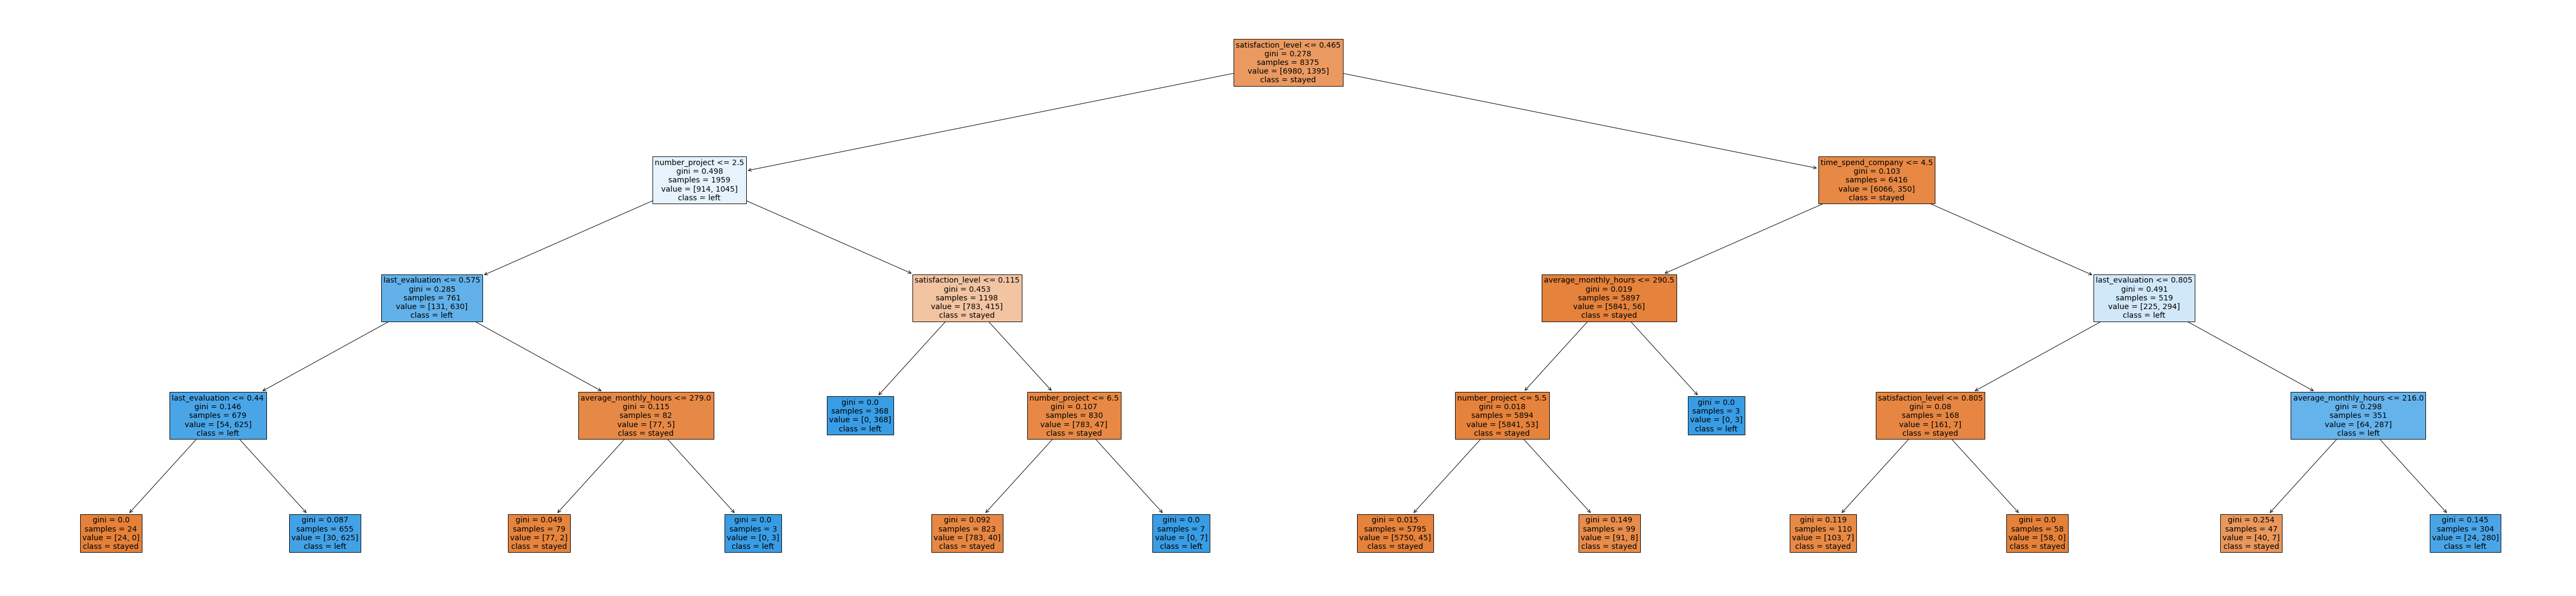

In [30]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

## Modeling Approach C-1: Random forest - Round 1

Note: random forest tree is randomize decision tree model that randomize decision in each way from sample and they can optimize predict for estimator rusult by weight of accuracy.

In [31]:
### YOUR CODE HERE ###
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [32]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    try:
        with open(path + saved_model_name + '.pickle', 'rb') as to_read:
            model = pickle.load(to_read)
        return model
    except FileNotFoundError as e:
        return False

In [33]:
# Define a path to the folder where you want to save the model
path = 'model/'

In [34]:
%%time
if not read_pickle(path, "rf1"):
    tree2.fit(X_train, Y_train)
    
    # Best parameters found by GridSearchCV
    print("Best Parameters:", tree2.best_params_)
    
    ## estimator evaluation
    print(make_results("random forest tree1",tree2,"auc"))
    
    best_model_rf1 = tree2.best_estimator_
    
else:
    best_model_rf1 = read_pickle(path, "rf1")

Best Parameters: {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
                 model  precision    recall        F1  accuracy       auc
0  random forest tree1   0.965511  0.922581  0.943534  0.981612  0.981721
CPU times: total: 11min 4s
Wall time: 12min 55s


Accuracy on Test Set: 0.9813753581661891
Precision on Test Set: 0.9657387580299786
Recall on Test Set: 0.9260780287474333
F1 score on Test Set: 0.9454926624737946
Area of under curve on Test Set: 0.9595682985385755


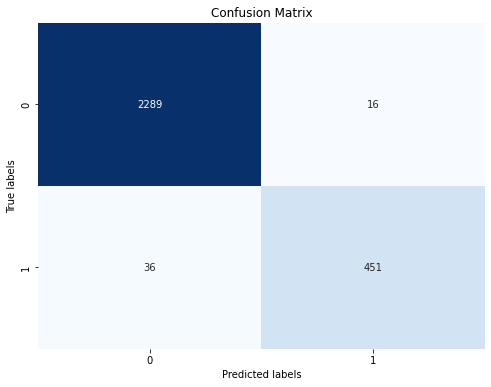

In [35]:
# Evaluate the model with best parameters on the test set
Y_pred = best_model_rf1.predict(X_test)

# Calculate accuracy on the test set
accuracy_3 = accuracy_score(Y_test, Y_pred)
precision_3 = precision_score(Y_test, Y_pred)
recall_3 = recall_score(Y_test, Y_pred)
f1_3 = f1_score(Y_test, Y_pred)
auc_3 = roc_auc_score(Y_test, Y_pred)

# Calculate confusion matrix
cm_3 = confusion_matrix(Y_test, Y_pred)

print("Accuracy on Test Set:", accuracy_3)
print("Precision on Test Set:", precision_3)
print("Recall on Test Set:", recall_3)
print("F1 score on Test Set:", f1_3)
print("Area of under curve on Test Set:", auc_3)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## When comparison to decision tree model that show

Evaluation score when test data result have accuracy is 98%, precision is 97%, recall is 92%, f1 score is 94% and AUC ROC score is 96% when compare to test data with decision tree model must as nearest same as well. By decision tree model have accuracy is 98%, precision is 96%, recall is 93%, f1 score is 94% and AUC ROC curve is 96% respectively.

## Save model if model file don't exist
- because model working very long.

In [36]:
### YOUR CODE HERE ###
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [37]:
write_pickle(path, best_model_rf1, "rf1") 

### Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [38]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df1 = X.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df1.head()

,last_evaluation,number_project,average_monthly_hours,time_spend_company,promotion_last_5_years
0,0.53,2,157,3,0
2,0.88,7,272,4,0
3,0.87,5,223,5,0
4,0.52,2,159,3,0
5,0.50,2,153,3,0


In [39]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df1['overworked'] = df1['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df1['overworked'].max())
print('Min hours:', df1['overworked'].min())

Max hours: 310
Min hours: 96


# Model assumption

mean working is 166.67 hours per month so how many hours must employee reliable for working

the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. `worked time = (50 * 5 * 8) / 12 = 166.67` 

If compare to average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 9 hours per day. If more than 9 hours per day they must overwork. `limit worked time = (50 * 5 * 9) / 12 = 177.08`

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 177.08` creates a series of booleans, consisting of `True` for every value > 177.08 and `False` for every values ≤ 177.08
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [40]:
# use percentiles is 95% person what average monthly hours
print('Quantiles hours:', df1['overworked'].quantile(0.95))

Quantiles hours: 273.0


In [41]:
limit_time = (50 * 5 * 9) / 12

# Define `overworked` as working > 175 hrs/week
df1['overworked'] = (df1['overworked'] > limit_time).astype(int)

# Display first few rows of new column
df1['overworked'].head()

0    0
2    1
3    1
4    0
5    0
Name: overworked, dtype: int32

In [42]:
# Drop the `average_monthly_hours` column
X_fe = df1.drop('average_monthly_hours', axis=1)

# Split the data into training and testing sets
X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = train_test_split(X_fe, Y, test_size=0.25, random_state=42)
print(f"train size {X_train.shape} per test size {X_test.shape}")

# Display first few rows of resulting dataframe
X_fe.head()

train size (8375, 6) per test size (2792, 6)


,last_evaluation,number_project,time_spend_company,promotion_last_5_years,overworked
0,0.53,2,3,0,0
2,0.88,7,4,0,1
3,0.87,5,5,0,1
4,0.52,2,3,0,0
5,0.50,2,3,0,0


## Modeling Approach B-2: Tree-based Model (Decision tree model)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6}
Accuracy on Test Set: 0.9570200573065902
Precision on Test Set: 0.8495238095238096
Recall on Test Set: 0.9158110882956879
F1 score on Test Set: 0.8814229249011858
Area of under curve on Test Set: 0.9407688847118352


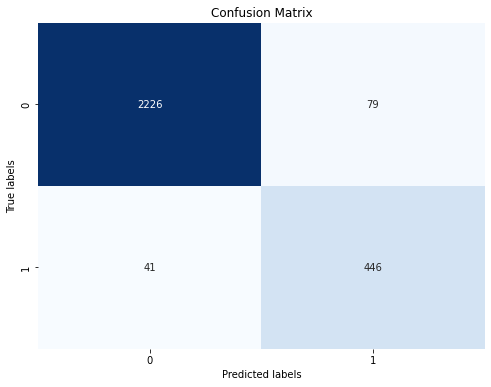

In [43]:
# Instantiate model
tree_fe = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1_fe = GridSearchCV(tree_fe, cv_params, scoring=scoring, cv=4, refit='roc_auc')

tree1_fe.fit(X_train_fe, Y_train_fe)

# Best parameters found by GridSearchCV
print("Best Parameters:", tree1_fe.best_params_)

# Evaluate the model with best parameters on the test set
best_model = tree1_fe.best_estimator_
Y_pred_fe = best_model.predict(X_test_fe)

# Calculate accuracy on the test set
accuracy_2_fe = accuracy_score(Y_test_fe, Y_pred_fe)
precision_2_fe = precision_score(Y_test_fe, Y_pred_fe)
recall_2_fe = recall_score(Y_test_fe, Y_pred_fe)
f1_2_fe = f1_score(Y_test_fe, Y_pred_fe)
auc_2_fe = roc_auc_score(Y_test_fe, Y_pred_fe)

# Calculate confusion matrix
cm_2_fe = confusion_matrix(Y_test_fe, Y_pred_fe)

print("Accuracy on Test Set:", accuracy_2_fe)
print("Precision on Test Set:", precision_2_fe)
print("Recall on Test Set:", recall_2_fe)
print("F1 score on Test Set:", f1_2_fe)
print("Area of under curve on Test Set:", auc_2_fe)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2_fe, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
## estimator evaluation
make_results("decision tree",tree1_fe,"auc")

,model,precision,recall,F1,accuracy,auc
0,decision tree,0.833306,0.905386,0.867808,0.95403,0.959662


# Decision tree model comparison when feature engineering

Evaluation score after feature engineering when test data result have accuracy is 96%, precision is 85%, recall is 92%, f1 score is 88% and AUC ROC score is 97% when compare to test data with decision tree model must as nearest same as well. By decision tree model have accuracy is 98%, precision is 96%, recall is 93%, f1 score is 94% and AUC ROC curve is 96% respectively.

So summarize that evaluation score is bit worse accuracy that before engineering but make bit better AUC ROC score in each validation.

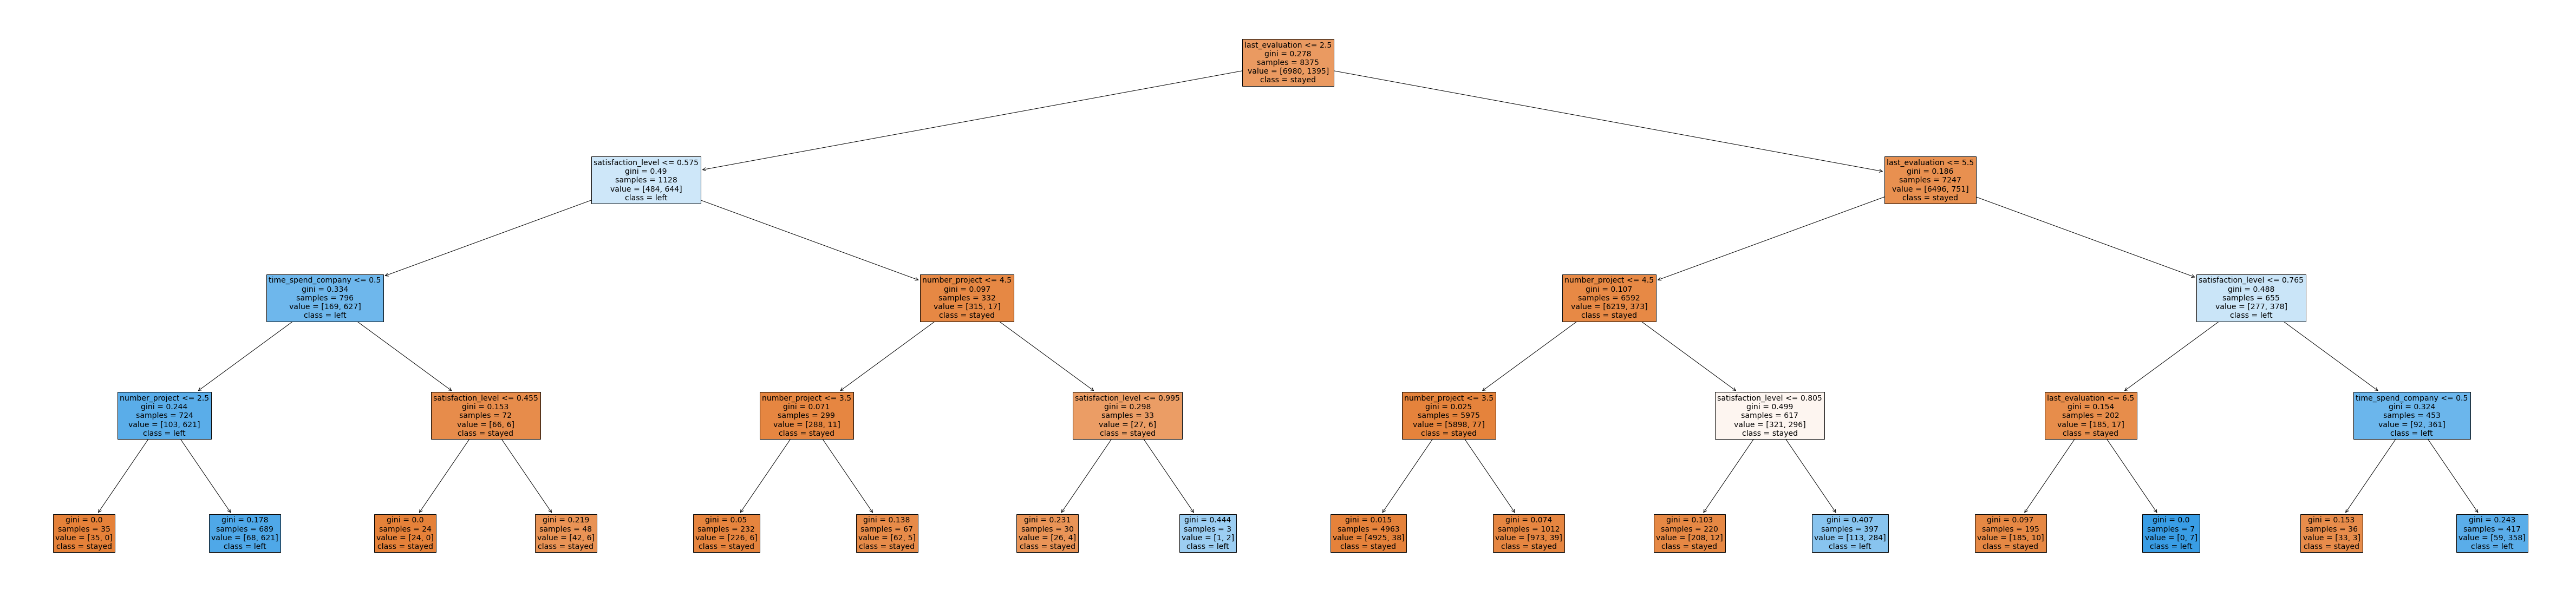

In [45]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1_fe.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

## Modeling Approach C-2: Random forest - Round 2

In [46]:
### YOUR CODE HERE ###
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2_fe = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [47]:
%%time
if not read_pickle(path, "rf2"):
    tree2_fe.fit(X_train_fe, Y_train_fe)
    
    # Best parameters found by GridSearchCV
    print("Best Parameters:", tree2_fe.best_params_)
    
    ## estimator evaluation
    print(make_results("random forest tree2",tree2_fe,"auc"))
    
    best_model_rf2 = tree2_fe.best_estimator_
    
    write_pickle(path, best_model_rf2, "rf2") 
else:
    best_model_rf2 = read_pickle(path, "rf2")

Best Parameters: {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
                 model  precision    recall        F1  accuracy       auc
0  random forest tree2    0.88671  0.899648  0.893036   0.96406  0.970888
CPU times: total: 7min 27s
Wall time: 8min 30s


Accuracy on Test Set: 0.9706303724928367
Precision on Test Set: 0.920997920997921
Recall on Test Set: 0.9096509240246407
F1 score on Test Set: 0.915289256198347
Area of under curve on Test Set: 0.9465825119038604


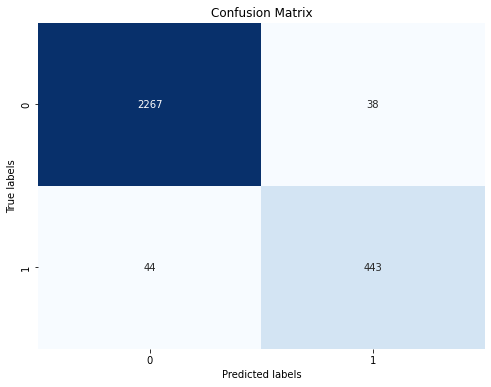

In [58]:
# Evaluate the model with best parameters on the test set
Y_pred_fe = best_model_rf2.predict(X_test_fe)

# Calculate accuracy on the test set
accuracy_3_fe = accuracy_score(Y_test_fe, Y_pred_fe)
precision_3_fe = precision_score(Y_test_fe, Y_pred_fe)
recall_3_fe = recall_score(Y_test_fe, Y_pred_fe)
f1_3_fe = f1_score(Y_test_fe, Y_pred_fe)
auc_3_fe = roc_auc_score(Y_test_fe, Y_pred_fe)

# Calculate confusion matrix
cm_3_fe = confusion_matrix(Y_test_fe, Y_pred_fe)

print("Accuracy on Test Set:", accuracy_3_fe)
print("Precision on Test Set:", precision_3_fe)
print("Recall on Test Set:", recall_3_fe)
print("F1 score on Test Set:", f1_3_fe)
print("Area of under curve on Test Set:", auc_3_fe)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3_fe, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Random forest model comparison when feature engineering

Evaluation score after feature engineering when test data result have accuracy is 97%, precision is 92%, recall is 91%, f1 score is 92% and AUC ROC score is 95% when compare to test data with previous random forest model must as nearest same as well. By test data in random forest model has accuracy is 98%, precision is 97%, recall is 92%, f1 score is 94% and AUC ROC score is 96%

So summarize that evaluation score make bit better AUC ROC score in each validation as same as decision tree model. So no more difference with about comparison.

### Decision tree feature importance

You can also get feature importance from decision trees (see the [DecisionTreeClassifier scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for details).

In [49]:
#tree1_fe_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree1_fe_importances = pd.DataFrame(tree1_fe.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X_fe.columns
                                )
tree1_fe_importances = tree1_fe_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances >= 0.01
tree1_fe_importances = tree1_fe_importances[tree1_fe_importances['gini_importance'] >= 0.01]
tree1_fe_importances

,gini_importance
number_project,0.447176
last_evaluation,0.306490
time_spend_company,0.176803
overworked,0.069531


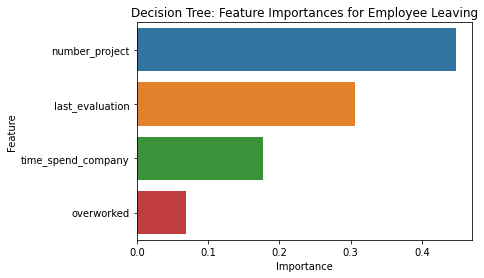

In [50]:
sns.barplot(data=tree1_fe_importances, x="gini_importance", y=tree1_fe_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Random forest feature importance

Now, plot the feature importances for the random forest model.

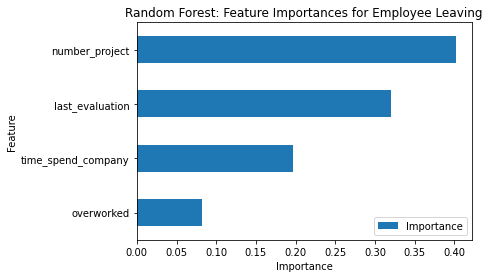

In [51]:
# Get feature importances
feat_impt = best_model_rf2.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(best_model_rf2.feature_importances_, -5)[-5:]

# Get column labels of top 10 features 
feat = X_fe.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
# Only extract the features with importances >= 0.01
y_sort_df = y_sort_df[y_sort_df['Importance'] >= 0.01]
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

## Summarized for tree-based model
- Column of important data who make root cause of insight problem for why employee quit from company that mean not include satisfaction score. highest important columns is number project that obviously because if worker has more than 7 projects they must exits because make they overworking, second columns is last evaluation because when employee get score higher in hard work may cause they quit from their jobs, third column is tenure if they alive more than 4 year - 5 year they must overwork and really quit from jobs, and overwork to lastly repectively for all tree base model like decision tree model and random forest model. 

## Modeling Approach D-1: Multiple Layer Perceptorn layer by keras model by non features engineering

Note: karas model has model ANN (artificial neural network) who can connected with input process with node into output models.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6)                 0         
                                                                 
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainabl

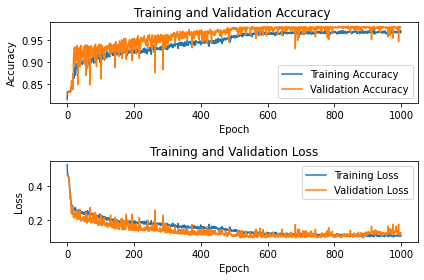

CPU times: total: 47.9 s
Wall time: 3min 59s


In [52]:
%%time
## train stage
# Build a simple model using Keras
if not read_pickle(path, "ann1"):
    model = keras.Sequential([
    layers.Flatten(input_shape=(6,)),
    layers.Dense(32, activation ='relu'),
    layers.Dense(16, activation ='relu'),
    layers.Dense(16, activation ='relu'),
    layers.Dropout(0.2),
    layers.Dense(2, activation ='softmax')])
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    # Train the model
    history = model.fit(X_train, Y_train, epochs=1000, validation_split=0.25, verbose=0)
    
    print(model.summary())
    
    write_pickle(path, model, "ann1") 
    
    # Plot training history for accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label ='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
    plt.title('Training and Validation Accuracy ')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Plot training history for loss
    plt.subplot(2 , 1 , 2)
    plt.plot(history.history['loss'], label ='Training Loss')
    plt.plot(history.history['val_loss'], label ='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    model = read_pickle(path, "ann1")

88/88 [==============================] - 0s 716us/step
Accuracy on Test Set: 0.9767191977077364
Precision on Test Set: 0.9647577092511013
Recall on Test Set: 0.8993839835728953
F1 score on Test Set: 0.9309245483528161
Area of under curve on Test Set: 0.9462212759513066


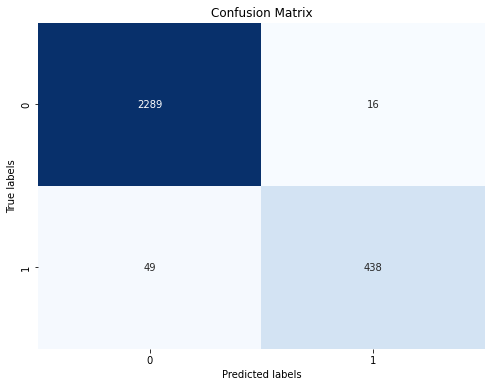

In [53]:
# prediction state
import numpy as np
Y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate accuracy on the test set
accuracy_4 = accuracy_score(Y_test, Y_pred)
precision_4 = precision_score(Y_test, Y_pred)
recall_4 = recall_score(Y_test, Y_pred)
f1_4 = f1_score(Y_test, Y_pred)
auc_4 = roc_auc_score(Y_test, Y_pred)

# Calculate confusion matrix
cm_4 = confusion_matrix(Y_test, Y_pred)

print("Accuracy on Test Set:", accuracy_4)
print("Precision on Test Set:", precision_4)
print("Recall on Test Set:", recall_4)
print("F1 score on Test Set:", f1_4)
print("Area of under curve on Test Set:", auc_4)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## When comparison to decision tree model that show

Evaluation score when test data result in karas neural network has accuracy is 98%, precision is 96%, recall is 90%, f1 score is 93% and AUC ROC is 95% compare to random forest tree have accuracy is 98%, precision is 97%, recall is 92%, f1 score is 94% and AUC ROC score is 96%, and test data with decision tree model must as nearest same as well. By decision tree model have accuracy is 98%, precision is 96%, recall is 93%, f1 score is 94% and AUC ROC curve is 96% respectivel.

Overall, Result of neural network is not same thing when they predict data then compare to decision tree and random forest If data is really more accuracy then real test data not more accuracy in next features that may leakage.

## Neural network with feature engineering

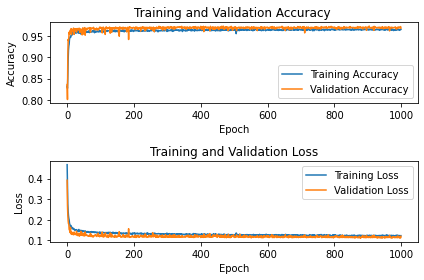

CPU times: total: 1min
Wall time: 4min 37s


In [54]:
%%time
if not read_pickle(path, "ann2"):
    ## train stage
    # Build a simple model using Keras
    model_fe = keras.Sequential([
    layers.Flatten(input_shape=(5,)),
    layers.Dense(32, activation ='relu'),
    layers.Dense(16, activation ='relu'),
    layers.Dense(16, activation ='relu'),
    layers.Dropout(0.2),
    layers.Dense(2, activation ='softmax')])
    # Compile the model
    model_fe.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    # Train the model
    history_fe = model_fe.fit(X_train_fe, Y_train_fe, epochs=1000, validation_split=0.2, verbose=0)
    
    write_pickle(path, model_fe, "ann2") 
    
    # Plot training history for accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history_fe.history['accuracy'], label ='Training Accuracy')
    plt.plot(history_fe.history['val_accuracy'], label ='Validation Accuracy')
    plt.title('Training and Validation Accuracy ')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Plot training history for loss
    plt.subplot(2 , 1 , 2)
    plt.plot(history_fe.history['loss'], label ='Training Loss')
    plt.plot(history_fe.history['val_loss'], label ='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    model_fe = read_pickle(path, "ann2")

88/88 [==============================] - 0s 772us/step
Accuracy on Test Set: 0.9674068767908309
Precision on Test Set: 0.9285714285714286
Recall on Test Set: 0.8809034907597536
F1 score on Test Set: 0.9041095890410961
Area of under curve on Test Set: 0.9332933939698985


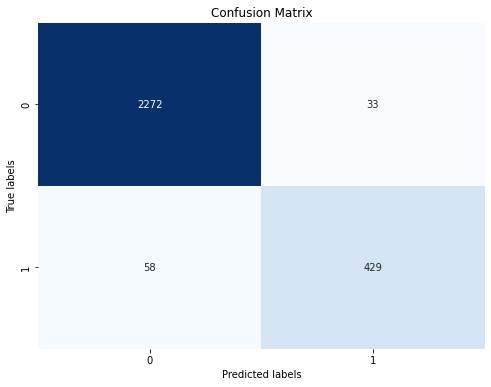

In [55]:
# prediction state
import numpy as np
Y_pred_fe = np.argmax(model_fe.predict(X_test_fe), axis=1 )

# Calculate accuracy on the test set
accuracy_4_fe = accuracy_score(Y_test_fe, Y_pred_fe)
precision_4_fe = precision_score(Y_test_fe, Y_pred_fe)
recall_4_fe = recall_score(Y_test_fe, Y_pred_fe)
f1_4_fe = f1_score(Y_test_fe, Y_pred_fe)
auc_4_fe = roc_auc_score(Y_test_fe, Y_pred_fe)

# Calculate confusion matrix
cm_4_fe = confusion_matrix(Y_test_fe, Y_pred_fe)

print("Accuracy on Test Set:", accuracy_4_fe)
print("Precision on Test Set:", precision_4_fe)
print("Recall on Test Set:", recall_4_fe)
print("F1 score on Test Set:", f1_4_fe)
print("Area of under curve on Test Set:", auc_4_fe)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_4_fe, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## When comparison to feature engineering decision tree model that show

Evaluation score when test data result in karas neural network has evaluation score as same as neural network without feature engineering.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. lack number project when HR given, mostly left employee is who number project is 2 and 5-7 projects and over half employee are overworking more than 9 hours per day, by evaluation score of hr need to improve because it important to decision who left or non left.
2. Improve employee project based to less or more between 3-5 project in each employee, get test for evaluation in every year and make employees work in company hour less than 8 hour or hired new employees for support in recent work in project
3. Restrict number project into employees because it make overworking and statisfied score of employee too low, Make more promotion for unsatisfied employee if he is very satisfied from their overworking into burnout.
4. Yes, because some features that affected into making efficient model but if real test data in reality are testing making less efficient for validate and leakage so remove it and make independent valiable and scope into really true insight for creating new feature.
5. how to hire new employees that most suitable for their work, can support team with more efficient way and less left in 3-5 years?
6.

    6.1. Excutive summary 
    
    6.2. Presentation slide
    
7. Sharing with bussiness knowledge and finding insight, always understanding the question from stakeholder for checking condition.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [59]:
# from 3 models has features engineering: decision tree, random forest tree and neural network model
dt={
    "accuracy": round(accuracy_2_fe*100,2),
    "precision": round(precision_2_fe*100,2),
    "recall": round(recall_2_fe*100,2),
    "f1": round(f1_2_fe*100,2), 
    "AUC": round(auc_2_fe*100,2)
}
rf={
    "accuracy": round(accuracy_3_fe*100,2),
    "precision": round(precision_3_fe*100,2),
    "recall": round(recall_3_fe*100,2),
    "f1": round(f1_3_fe*100,2), 
    "AUC": round(auc_3_fe*100,2)
}
nn={
    "accuracy": round(accuracy_4_fe*100,2),
    "precision": round(precision_4_fe*100,2),
    "recall": round(recall_4_fe*100,2),
    "f1": round(f1_4_fe*100,2),
    "AUC": round(auc_4_fe*100,2)
}

print(dt)
print(rf)
print(nn)

{'accuracy': 95.7, 'precision': 84.95, 'recall': 91.58, 'f1': 88.14, 'AUC': 94.08}
{'accuracy': 97.06, 'precision': 92.1, 'recall': 90.97, 'f1': 91.53, 'AUC': 94.66}
{'accuracy': 96.74, 'precision': 92.86, 'recall': 88.09, 'f1': 90.41, 'AUC': 93.33}


### Conclusion

- column of important data who make root cause of insight problem for why employee quit from company that mean not include satisfaction score is number project,last evaluation, tenure, overwork repectively for all tree base model like decision tree model and random forest model to make more effciency.
- layer in neural network make feture engineering that sense train and test with epoch is 1000 times has result nearest random forest tree models by random forest tree model have most efficient ways to predict data.

### Recommendations, Next Steps

If use kmean for cluster group than mean get more efficiency model for predict realistic data and support with PCA that may be better like get in other dimension columns and test on other get more accuracy predict may be better in some case not at all.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.